In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

Skal lage en fordeling som er mixture av normals. Har to tettheter f og g, sannsynlighet a at realisering blir trukket fra f. Skal begynne med å lage "homemade" pdf og rvs

In [21]:
f, g  = norm(), norm(3,.5)
a = .6 # sannsynlighet for at vi trekker fra f

In [17]:
def mixnorm_rvs(N):
    y = np.empty(N)
    for n in range(N):
        x = np.random.uniform()
        h = f if x < a else g
        y[n] = h.rvs()
    return y

In [14]:
def mixnorm_pdf(s):
    # sum av pdf, men skalert etter sannsynlighet..
    return a*f.pdf(s)+(1-a)*g.pdf(s)

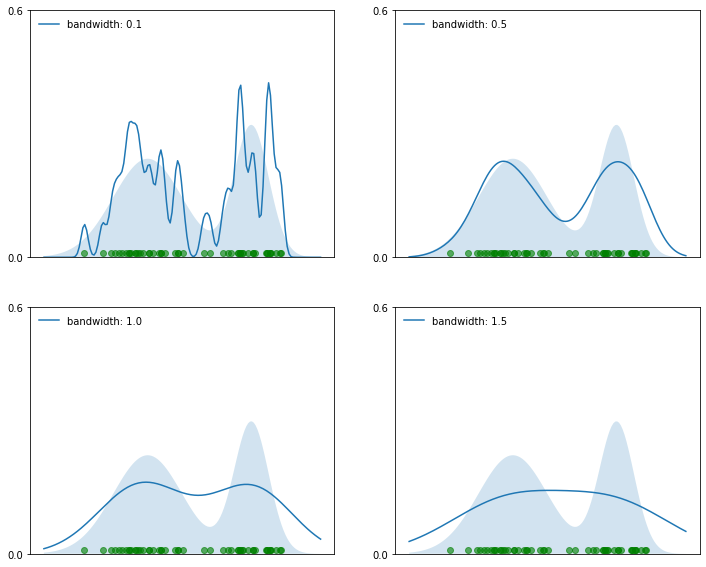

In [38]:
xmin, xmax = -3,5
grid_len = 150
grid = np.linspace(xmin,xmax,grid_len)

N = 50
obs = mixnorm_rvs(N)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()
bws = 0.1, 0.5, 1.0, 1.5

for bw, ax in zip(bws, axes):

    ax.set_ylim(0, 0.6)
    ax.set_yticks((0, 0.6))
    ax.set_xticks([])
    ax.fill_between(grid, 0*grid, mixnorm_pdf(grid), alpha=0.2)
    
    ax.plot(obs, [0.01] * N, 'go', alpha=0.6)
    kde = KernelDensity(bandwidth=bw).fit(obs.reshape(N, 1))
    log_dens = kde.score_samples(grid.reshape(grid_len, 1))
    ax.plot(grid,np.exp(log_dens),label=f'bandwidth: {bw}')
    ax.legend(frameon=False,loc='upper left')

In [26]:
kde = KernelDensity(bandwidth=bw).fit(obs.reshape(N, 1))